In [1]:
#Overfitting and Underfitting in Decision Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
def analyzer(max_depth):
    data=pd.read_csv(r"C:\Users\Shraddha\Downloads\archive (4)\Social_Network_Ads.csv")
    x=data.iloc[:,2:4].values
    y=data.iloc[:,-1].values
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x,y)
    a=np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.1)
    b=np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=100)
    xx,yy=np.meshgrid(a,b)
    input_array=np.array([xx.ravel(),yy.ravel()]).T
    labels=clf.predict(input_array)
    plt.contour(xx,yy,labels.reshape(xx.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1],c=y)
    

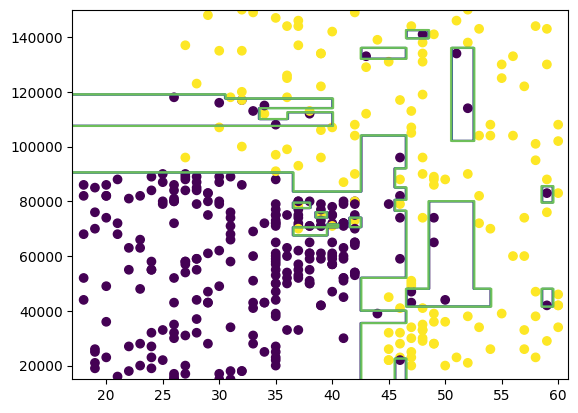

In [4]:
analyzer(max_depth=None)

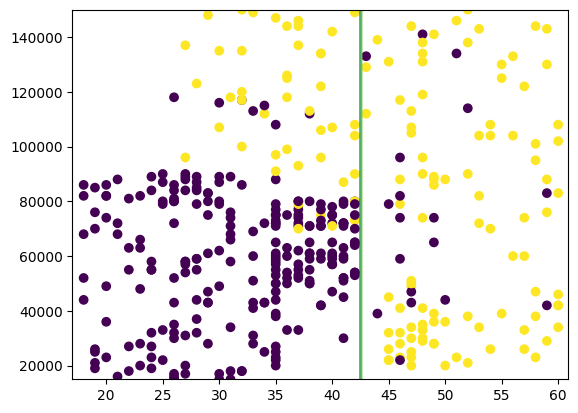

In [5]:
analyzer(max_depth=1)

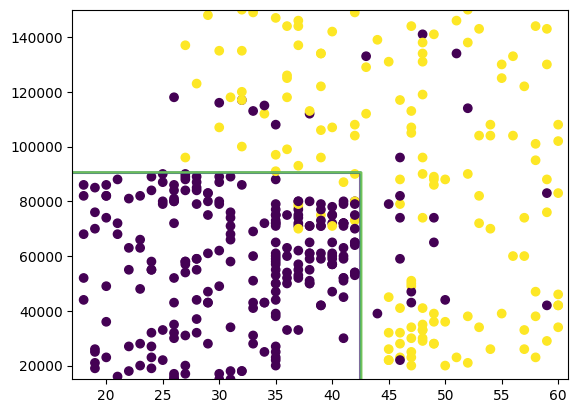

In [6]:
analyzer(max_depth=2)

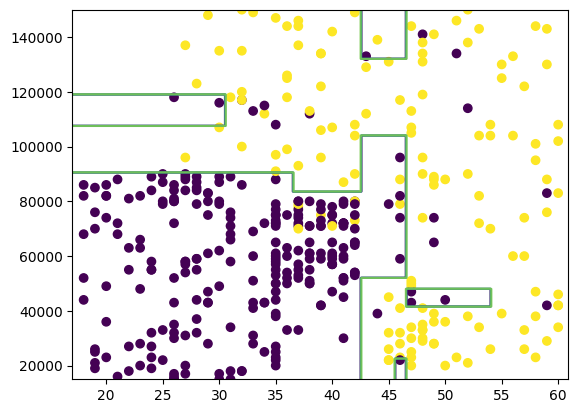

In [7]:
analyzer(max_depth=5)

In [3]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_bostom
from sklearn.model_selection import GridSearchCV

ImportError: cannot import name 'load_bostom' from 'sklearn.datasets' (C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\datasets\__init__.py)

In [9]:
!pip install pandas_datareader

In [10]:
!pip install pandas-datareader

In [4]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data
y = housing.target

from sklearn.model_selection import GridSearchCV

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
rt = DecisionTreeRegressor(criterion='squared_error',max_depth=5)

In [8]:
rt.fit(x_train,y_train)

ValueError: could not convert string to float: 'RL'

In [13]:
print(X.head())
print('-'*150)
print(y.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

In [14]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [17]:
rt = DecisionTreeRegressor(criterion='squared_error',max_depth=5)

In [18]:
rt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
y_pred = rt.predict(x_test)

In [20]:
r2_score(y_test,y_pred)

0.7958598635149987

In [21]:
#Hyperparameter Tuning

In [23]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,0.1]
}

In [24]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [25]:
reg.fit(x_train,y_train)

C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 0.1]})

In [26]:
reg.best_score_

np.float64(0.6847595197737562)

In [28]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.1}

In [29]:
#Feature Importance

In [31]:
for importance, name in sorted(zip(rt.feature_importances_,x_train.columns),reverse=True):
    print(name,importance)

OverallQual 0.7339255580871025
GrLivArea 0.10603759250807779
2ndFlrSF 0.03299832315026951
TotalBsmtSF 0.028447729299303313
BsmtFinSF1 0.016471248752239577
LotFrontage 0.014030332059613333
1stFlrSF 0.01354481006385389
GarageCars 0.011168700159687512
GarageType_Detchd 0.009171414500775663
GarageYrBlt 0.006742539202339285
MoSold 0.006631041259808427
CentralAir_Y 0.006471273088311943
GarageArea 0.0038158951345315484
OverallCond 0.0027902492494027023
Functional_Typ 0.002646103518712998
SaleCondition_Partial 0.0018220763909176877
KitchenQual_Gd 0.0014955945698817458
MasVnrType_None 0.0011984726714069141
BsmtUnfSF 0.0005910463337637464
YrSold 0.0
YearRemodAdd 0.0
YearBuilt 0.0
WoodDeckSF 0.0
Utilities_NoSeWa 0.0
Utilities_AllPub 0.0
TotRmsAbvGrd 0.0
Street_Pave 0.0
Street_Grvl 0.0
ScreenPorch 0.0
SaleType_WD 0.0
SaleType_Oth 0.0
SaleType_New 0.0
SaleType_ConLw 0.0
SaleType_ConLI 0.0
SaleType_ConLD 0.0
SaleType_Con 0.0
SaleType_CWD 0.0
SaleType_COD 0.0
SaleCondition_Normal 0.0
SaleCondition_Fa

In [1]:
#Visualizing Decision Tree

In [2]:
import graphviz.backend as be

In [3]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [5]:
clas = tree.DecisionTreeClassifier(max_depth=2)
iris=load_iris()
x_train = iris.data
y_train = iris.target
clas.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

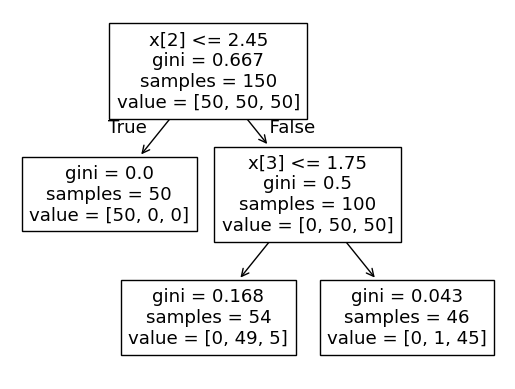

In [6]:
from sklearn.tree import plot_tree
plot_tree(clas)

1. Classification

In [12]:
viz = dtreeviz(clas.x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz

NameError: name 'dtreeviz' is not defined

In [11]:
from dtreeviz.trees import dtreeviz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtreeviz\trees.py)

In [15]:
regr = tree.DecisionTreeRegressor(max_depth=2)
iris = load_iris()
x_train = iris.data
y_train = iris.target
regr.fit(x_train,y_train)
viz = dtreeviz(regr,x_train,y_train,target_name='sepal_length',feature_names=iris.feature_names)
viz

NameError: name 'dtreeviz' is not defined

In [ ]:
import numpy as np

def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

def best_split(X, y):
    best_gain = 0
    best_feature, best_value = None, None
    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for val in values:
            left_idx = X[:, feature] <= val
            right_idx = X[:, feature] > val
            if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                continue
            gini_left = gini(y[left_idx])
            gini_right = gini(y[right_idx])
            weighted_gini = (len(y[left_idx])*gini_left + len(y[right_idx])*gini_right) / len(y)
            gain = gini(y) - weighted_gini
            if gain > best_gain:
                best_gain = gain
                best_feature, best_value = feature, val
    return best_feature, best_value

class DecisionTreeScratch:
    def __init__(self, depth=0, max_depth=3):
        self.depth = depth
        self.max_depth = max_depth

    def fit(self, X, y):
        self.feature, self.value = best_split(X, y)
        if self.feature is None or self.depth == self.max_depth:
            self.prediction = np.bincount(y).argmax()
            return
        left_idx = X[:, self.feature] <= self.value
        right_idx = X[:, self.feature] > self.value
        self.left = DecisionTreeScratch(self.depth + 1, self.max_depth)
        self.right = DecisionTreeScratch(self.depth + 1, self.max_depth)
        self.left.fit(X[left_idx], y[left_idx])
        self.right.fit(X[right_idx], y[right_idx])

    def predict(self, X):
        if hasattr(self, 'prediction'):
            return self.prediction
        if X[self.feature] <= self.value:
            return self.left.predict(X)
        else:
            return self.right.predict(X)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Model
reg_model = DecisionTreeRegressor(max_depth=3)
reg_model.fit(X_train, y_train)

# Prediction
y_pred = reg_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred))

RMSE: 0.008530571992110448
